# Matic (Polygon) price prediction with LSTM

![](https://media.giphy.com/media/RLCSctqFN6IGoHL6pS/giphy.gif)



# Introduction

I have been interested in cryptocurrencies for about a year, which is why I took up this topic. Matic (Polygon) was chosen as the dataset because I invested real money in it. This work was done on the basis of various studies and materials found on the Internet concerning the problem of time series prediction with LSTM.

# What is Matic (Polygon)?


Polygon has its own cryptocurrency, called MATIC, which is used to pay fees on the Polygon network, for staking, and for governance (which means that MATIC holders get to vote on changes to Polygon). You can also buy and sell MATIC via Coinbase and other exchanges.

The name MATIC comes from an earlier stage in Polygon’s development. After launching as Matic Network in October 2017, developers rebranded as Polygon early in 2021.  

# What is LSTM?
Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

For more information, click the link: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235


# Importing Library

In [746]:
!pip install plotly

In [747]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt



from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
# from xgboost import XGBRegressor
# from sklearn.ensemble import AdaBoostRegressor - for future exercise using Machine Learning





import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Loading and Exploring Dataset

In [748]:
# We start with loading the dataset 

matic_df=pd.read_csv('Matic Historical Data.csv')

In [749]:
# Let's generate some descriptive statistics
matic_df.describe()

,Open,High,Low,Close,Volume
count,1013.000000,1013.000000,1013.000000,1013.000000,1.013000e+03
mean,0.556095,0.588885,0.524209,0.557648,3.781378e+08
std,0.755265,0.797295,0.712407,0.755833,3.808195e+08
min,0.008000,0.009000,0.007000,0.008000,3.302184e+07
25%,0.017000,0.017000,0.016000,0.017000,1.534678e+08
50%,0.023000,0.025000,0.022000,0.023000,2.610253e+08
75%,1.264000,1.345000,1.189000,1.265000,4.623559e+08
max,2.874000,2.922000,2.712000,2.874000,6.204860e+09


In [750]:
matic_df.columns= matic_df.columns.str.lower()
# Converts pandas column names to lowercase just for practical matters

In [751]:
matic_df.shape
# Returns number of records and columns of the dataset

(1013, 6)

In [752]:
print('Total number of days present in the dataset: ',matic_df.shape[0])
print('Total number of fields present in the dataset: ',matic_df.shape[1])

Total number of days present in the dataset:  1013
Total number of fields present in the dataset:  6


In [753]:
matic_df.head()
# Returns first 5 rows of the dataset

,date,open,high,low,close,volume
0,2019-06-27,0.018,0.022,0.017,0.019,1564289792
1,2019-06-28,0.019,0.021,0.019,0.019,929598144
2,2019-06-29,0.019,0.027,0.019,0.024,1788176128
3,2019-06-30,0.024,0.027,0.022,0.022,1522535296
4,2019-07-01,0.022,0.023,0.020,0.022,974462528


In [754]:
matic_df.tail()
# Returns last 5 rows of the dataset

,date,open,high,low,close,volume
1008,2022-03-31,1.681,1.750,1.609,1.618,84729232
1009,2022-04-01,1.618,1.712,1.563,1.695,77639632
1010,2022-04-02,1.695,1.728,1.649,1.652,68673024
1011,2022-04-03,1.653,1.713,1.633,1.687,49460848
1012,2022-04-04,1.688,1.688,1.608,1.636,60411940


In [755]:
# Let's check the type of data
matic_df.info()
# We can observe that "date" column is in fact not a datetype. That's why we will change it to datetype in the future.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1013 non-null   object 
 1   open    1013 non-null   float64
 2   high    1013 non-null   float64
 3   low     1013 non-null   float64
 4   close   1013 non-null   float64
 5   volume  1013 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.6+ KB


In [756]:
print('Null Values:',matic_df.isnull().values.sum())

# Luckily no data is missing 

Null Values: 0


In [757]:
print('NA values:',matic_df.isnull().values.any())

NA values: False


In [758]:
# Printing the start date and End date of the dataset

sd=matic_df.iloc[0][0]
ed=matic_df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2019-06-27
Ending Date 2022-04-04


In [759]:
matic_df['date'] = pd.to_datetime(matic_df['date'], format='%Y-%m-%d')

# Here we change the type of "date" column to be datetime



In [760]:
matic_df.info()

# Now we can check that we have a good type of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1013 non-null   datetime64[ns]
 1   open    1013 non-null   float64       
 2   high    1013 non-null   float64       
 3   low     1013 non-null   float64       
 4   close   1013 non-null   float64       
 5   volume  1013 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.6 KB


# Matic (Polygon) 2020 Analysis

In [761]:
y_2020 = matic_df.loc[(matic_df['date'] >= '2020-01-01')
                     & (matic_df['date'] <= '2020-12-31')]

# We will focus on analyzing 2020 year only


In [762]:
y_2020.drop(y_2020[['volume']],axis=1)

# Here we are getting rid of "volume" column from 2020 year dataset

,date,open,high,low,close
188,2020-01-01,0.014,0.015,0.014,0.015
189,2020-01-02,0.015,0.016,0.014,0.015
190,2020-01-03,0.015,0.015,0.014,0.015
191,2020-01-04,0.015,0.015,0.015,0.015
192,2020-01-05,0.015,0.015,0.015,0.015
...,...,...,...,...,...
549,2020-12-27,0.019,0.020,0.018,0.018
550,2020-12-28,0.018,0.020,0.018,0.019
551,2020-12-29,0.019,0.019,0.018,0.018
552,2020-12-30,0.018,0.019,0.018,0.018


In [763]:
# Data preparation for monthly analysis (average price)

monthly= y_2020.groupby(y_2020['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthly = monthly.reindex(new_order, axis=0)
monthly

,open,close
date,,
January,0.015968,0.016097
February,0.021000,0.021103
March,0.015000,0.014710
April,0.013067,0.013200
May,0.019419,0.019613
June,0.020933,0.020867
July,0.020645,0.020645
August,0.024903,0.025129
September,0.020167,0.019933


In [764]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['open'],
    name='Matic (Polygon) Open Price',
    marker_color='MediumPurple'
))
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly['close'],
    name='Matic (Polygon) Close Price',
    marker_color='crimson'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Matic (Polygon) monthly comparision between average open and close price in 2020',
                 yaxis=dict(
        title='Matic (Polygon) Price [USD]',
        titlefont_size=16,
        tickfont_size=14,),
                 xaxis=dict(
        title='2020 Month',
        titlefont_size=16,
        tickfont_size=14,))
fig.show()

In [765]:
# Data preparation for monthly analysis (lowest and highest price)

y_2020.groupby(y_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2020.groupby(matic_df['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

In [766]:

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(157,226,79)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(135,206,250)'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Matic (Polygon) monthly comparision between highest and lowest price in 2020',
                 yaxis=dict(
        title='Matic (Polygon) Price [USD]',
        titlefont_size=16,
        tickfont_size=14,),
                 xaxis=dict(
        title='2020 Month',
        titlefont_size=16,
        tickfont_size=14,))
fig.show()

In [767]:
# Preparing data for Open, CLose, High and Low price for Matic (Polygon)

names = cycle(['Matic (Polygon) Open Price','Matic (Polygon) Close Price','Matic (Polygon) High Price','Matic (Polygon) Low Price'])

fig = px.line(y_2020, x=y_2020.date, y=[y_2020['open'], y_2020['close'], 
                                          y_2020['high'], y_2020['low']],
             labels={'date': 'Date','value':'Matic (Polygon) Price [USD]'})
fig.update_layout(title_text='Matic (Polygon) analysis graph for 2020', font_size=15, font_color='black',legend_title_text='Legend:')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

# Matic (Polygon) analysis for all dataset (2019-2022)

In [768]:

matic_df.drop(matic_df[['volume']],axis=1)

,date,open,high,low,close
0,2019-06-27,0.018,0.022,0.017,0.019
1,2019-06-28,0.019,0.021,0.019,0.019
2,2019-06-29,0.019,0.027,0.019,0.024
3,2019-06-30,0.024,0.027,0.022,0.022
4,2019-07-01,0.022,0.023,0.020,0.022
...,...,...,...,...,...
1008,2022-03-31,1.681,1.750,1.609,1.618
1009,2022-04-01,1.618,1.712,1.563,1.695
1010,2022-04-02,1.695,1.728,1.649,1.652
1011,2022-04-03,1.653,1.713,1.633,1.687


In [769]:
fig = px.line(matic_df, x=matic_df.date, y=[matic_df['open'], matic_df['close'], 
                                          matic_df['high'], matic_df['low']],
             labels={'date': 'Date','value':'Matic (Polygon) Price [USD]'})
fig.update_layout(title_text='Matic (Polygon) analysis graph for 2019-2022', font_size=15, font_color='black',legend_title_text='Legend:')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

# LSTM Prediction

As we could see on the graph above, the Matic (Polygon) price went significantly hight since the begining of 2021, that is why we will consider the period from Jan 1st for our predictions

In [770]:
# Lets First Take all the Close Price 
matic_close_df = matic_df[['date','close']]
print("Shape of close dataframe:", matic_close_df.shape)

Shape of close dataframe: (1013, 2)


In [771]:
fig = px.line(matic_close_df, x=matic_close_df.date, y=matic_close_df.close,
             labels={'date': 'Date','close':'Matic (Polygon) Price [USD]'})
fig.update_layout(title_text='Matic (Polygon) analysis graph for 2019-2022', font_size=15, font_color='black',legend_title_text='Legend:')
# fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

In [772]:
# Now we will Take data from 1st of January 2021
matic_close_df = matic_close_df[matic_close_df['date'] >= '2021-01-01']
matic_close_stock = matic_close_df.copy()
print("Total data for prediction: ",matic_close_df.shape[0])

Total data for prediction:  459


In [773]:
matic_close_df

,date,close
554,2021-01-01,0.018
555,2021-01-02,0.019
556,2021-01-03,0.020
557,2021-01-04,0.025
558,2021-01-05,0.024
...,...,...
1008,2022-03-31,1.618
1009,2022-04-01,1.695
1010,2022-04-02,1.652
1011,2022-04-03,1.687


In [774]:
fig = px.line(matic_close_df, x=matic_close_df.date, y=matic_close_df.close,
             labels={'date': 'Date','close':'Matic (Polygon) Price [USD]'})
fig.update_layout(title_text='Considered period to predict Matic (Polygon) close price', font_size=15, font_color='black',legend_title_text='Legend:')
# fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [775]:
# Here we are deleting the date column and normalizing using MinMax Scaler

del matic_close_df['date']

scaler=MinMaxScaler(feature_range=(0,1))
matic_close_df=scaler.fit_transform(np.array(matic_close_df).reshape(-1,1))
print(matic_close_df.shape)

(459, 1)


In [776]:
matic_close_df

array([[0.00000000e+00],
       [3.50140056e-04],
       [7.00280112e-04],
       [2.45098039e-03],
       [2.10084034e-03],
       [5.95238095e-03],
       [5.25210084e-03],
       [4.90196078e-03],
       [5.25210084e-03],
       [4.20168067e-03],
       [2.80112045e-03],
       [2.80112045e-03],
       [4.20168067e-03],
       [5.25210084e-03],
       [5.60224090e-03],
       [5.25210084e-03],
       [5.60224090e-03],
       [6.30252101e-03],
       [4.90196078e-03],
       [5.60224090e-03],
       [3.85154062e-03],
       [4.55182073e-03],
       [5.60224090e-03],
       [5.25210084e-03],
       [5.25210084e-03],
       [8.75350140e-03],
       [8.40336134e-03],
       [7.35294118e-03],
       [7.70308123e-03],
       [7.70308123e-03],
       [7.00280112e-03],
       [8.05322129e-03],
       [8.05322129e-03],
       [9.10364146e-03],
       [1.01540616e-02],
       [1.29551821e-02],
       [1.19047619e-02],
       [1.71568627e-02],
       [1.85574230e-02],
       [2.83613445e-02],


Spliting data into Training set, Validation set and Testing set

In [777]:
# we keep the training set as 70%, 10% for validation and 20% for test
q_70 = int(len(matic_close_df) * .7)
q_80 = int(len(matic_close_df) * .8)

train_data, validation_data, test_data=matic_close_df[0:q_70,:],matic_close_df[q_70:q_80,:], matic_close_df[q_80:,:]
print("train_data: ", train_data.shape)
print("validation_data", validation_data.shape)
print("test_data: ", test_data.shape)

train_data:  (321, 1)
validation_data (46, 1)
test_data:  (92, 1)


We need to transform the close price based on Time-series-analysis forecasting requirement   

In [778]:
# convert an array of values into a dataset matrix
# creating dataset in time series for LSTM model 

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [779]:
time_step = 10 #It means that we will take 10 previous days to predict Matic (Polygon) price for the next day
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(validation_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)

print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (310, 10)
y_train:  (310,)
X_val:  (35, 10)
y_val:  (35,)
X_test:  (81, 10)
y_test (81,)


In [780]:
# According to the LSTM requirements, we need input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_val: ", X_val.shape)
print("X_test: ", X_test.shape)

X_train:  (310, 10, 1)
X_val:  (35, 10, 1)
X_test:  (81, 10, 1)


Now we can build our model

In [781]:
model=Sequential()

model.add(LSTM(64,input_shape=(X_train.shape[1],1),activation="relu"))

model.add(Dense(1))

# # model.compile(loss="mean_squared_error",optimizer="adam")

model.compile(loss="mean_squared_error", 
              optimizer='adam', 
              metrics=["accuracy"])
early_stopping = EarlyStopping(monitor="val_accuracy", 
                               patience=3,
                               restore_best_weights=True)



In [782]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=4,verbose=1)

Epoch 1/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0270 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0286
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0077 - val_accuracy: 0.0286
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0286
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0286
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0286
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0286
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_ac

78/78 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0286
Epoch 58/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0286
Epoch 59/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0286
Epoch 60/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_accuracy: 0.0286
Epoch 61/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0286
Epoch 62/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0286
Epoch 63/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy

Let's see Training loss vs Validation loss 

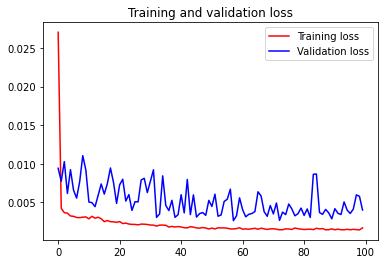

<Figure size 432x288 with 0 Axes>

In [783]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [784]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)
train_predict.shape, val_predict.shape, test_predict.shape

((310, 1), (35, 1), (81, 1))

In [785]:
X_train.shape

(310, 10, 1)

# Model Evaluation

In [786]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_yval = scaler.inverse_transform(y_val.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

# Evaluation metrices RMSE, MSE and MAE

In [787]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))

print("-------------------------------------------------------------------------------------")
print("Validation data RMSE: ", math.sqrt(mean_squared_error(original_yval,val_predict)))
print("Validation data MSE: ", mean_squared_error(original_yval,val_predict))
print("Validation data MAE: ", mean_absolute_error(original_yval,val_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.10500422893163755
Train data MSE:  0.011025888093527747
Train data MAE:  0.0650676240764318
-------------------------------------------------------------------------------------
Validation data RMSE:  0.18105779214594556
Validation data MSE:  0.03278192409676443
Validation data MAE:  0.15053512140001574
-------------------------------------------------------------------------------------
Test data RMSE:  0.08464884080476442
Test data MSE:  0.00716542624959035
Test data MAE:  0.06317652035936898


# Variance Regression Score

In [788]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))

print("Validation data explained variance regression score:", 
      explained_variance_score(original_yval, val_predict))

print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9699631318293703
Validation data explained variance regression score: 0.7478697742759782
Test data explained variance regression score: 0.8666593086987572


# R square score for regression

In [789]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))

print("Validation data R2 score:", r2_score(original_yval, val_predict))

print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9696693415199058
Validation data R2 score: 0.6037136517044033
Test data R2 score: 0.8655668380098798


# Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [790]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Validation data MGD: ", mean_gamma_deviance(original_yval, val_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Validation data MPD: ", mean_poisson_deviance(original_yval, val_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.035296387927385396
Validation data MGD:  0.006865425253036429
Test data MGD:  0.002462955826357692
----------------------------------------------------------------------
Train data MPD:  0.009989357849426823
Validation data MPD:  0.014893495772768883
Test data MPD:  0.004174131787682045


# Comparision of original stock close price and predicted close price

In [791]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(matic_close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift validation predictions for plotting
valPredictPlot = np.empty_like(matic_close_df)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(train_predict)+(look_back*2)+1:len(train_predict)+(look_back*2)+1+len(val_predict), :] = val_predict
print("Validation predicted data: ", valPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(matic_close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+len(val_predict)+look_back+1:len(matic_close_df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Validation predicted close price', 'Test predicted close price'])


plotdf = pd.DataFrame({'date': matic_close_stock['date'],
                       'original_close': matic_close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'val_predicted_close': valPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['val_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Matic (Polygon) Price [USD]','date': 'Date'})
fig.update_layout(title_text='Matic(Polygon) ORIGINAL close price vs PREDICTED close price',
                  plot_bgcolor='white', font_size=18, font_color='black', legend_title_text='Legend:')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

Train predicted data:  (459, 1)
Validation predicted data:  (459, 1)
Test predicted data:  (459, 1)


At first glance, our algorithm seems to be great at predicting Matic (Polygon) future prices, but is it really? Well, in fact, if we zoom the chart we will notice that our predictions for each day are basically the value of the day before, plus a little extra (so the graph is basically shifted). Rather than looking back on the last 5 test data values and predicting only the very next value, we shall now keep the prediction value, and store it as part of our input data.

# Predicting next 40 days based on the last 10 days

In [792]:

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 40 # Here we decide how many days we want to predict
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  40


# Plotting last 10 days of dataset and next predicted 40 days

In [793]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]


In [794]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(matic_close_df[len(matic_close_df)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 10 days close price','Predicted next 40 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Matic (Polygon) Price [USD]','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 10 days vs next 40 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Legend:')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



Now we see a graph with a completely different shape than that obtained on the test. Conclusion is that we can't simply predict cryptocurrencies values just based on it's historical data